In [1]:
library(tidyverse)

# Custom package
library(rutils)

-- Attaching packages --------------------------------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ------------------------------------------------------------------------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
dirs <- rutils::get_dev_directories(dev_paths_file = "../dev_paths.txt")
projects <- c("CESC", "UCS", "UCEC")
unified_dsets <- c("unified_cervical_data", "unified_uterine_data", "unified_uterine_endometrial_data")

In [3]:
dset_idx <- 3

In [4]:
text_size <- 11
guide_size <- 1
family <- "arial"
dpi <- 320
ht <- 3
wd <- 6

top_n <- 10

In [5]:
deg_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_go.tsv"))
deg_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_kegg.tsv"))
demg_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_go.tsv"))
demg_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_kegg.tsv"))
figo_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_go.tsv"))
figo_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_kegg.tsv"))
survival_go_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_go.tsv"))

# No survival KEGG results for UCEC
if (dset_idx != 3) {
    survival_kegg_df <- read_tsv(paste0(dirs$analysis_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_kegg.tsv"))
}



-- Column specification --------------------------------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double(),
  ont = col_character()
)



-- Column specification --------------------------------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double()
)



-- Column specification --------------------------------------------------------------------------------------------------------------------------
cols(
  type = col_character(),
  geneIDs = col_character(),
  count = col_double(),
  ratio = col_double(),
  qval = col_double(),
  ont = col_character()
)



-- Column specification ----------------------------------------------------------------------------

In [6]:
ea_plot <- function(df, title = "", top = 40, label_size = 16, qval_thresh = 0.05) {
    df <- df %>%
        dplyr::filter(qval < qval_thresh) %>%
        dplyr::top_n(n = -top, wt = qval) %>%
        dplyr::arrange(-log10(qval)) %>%
        dplyr::mutate(type_fact = factor(type, levels = type))
    ggplot(df) +
        geom_bar(aes(x = type_fact, y = -log10(qval)), stat = "identity") +
        theme_classic() +
        theme(
            text = element_text(size = text_size, family = family),
            axis.title.y = element_blank(),
        ) +
        labs(y = bquote(paste(-log[10], italic(q), "-value"))) +
        coord_flip()
}


# DEG enrichment

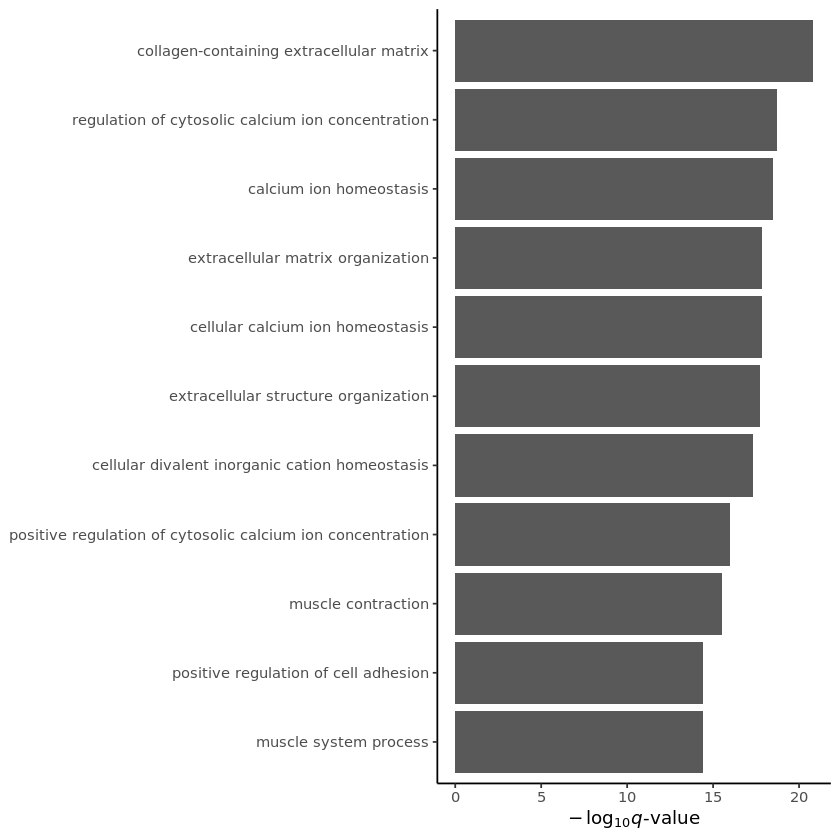

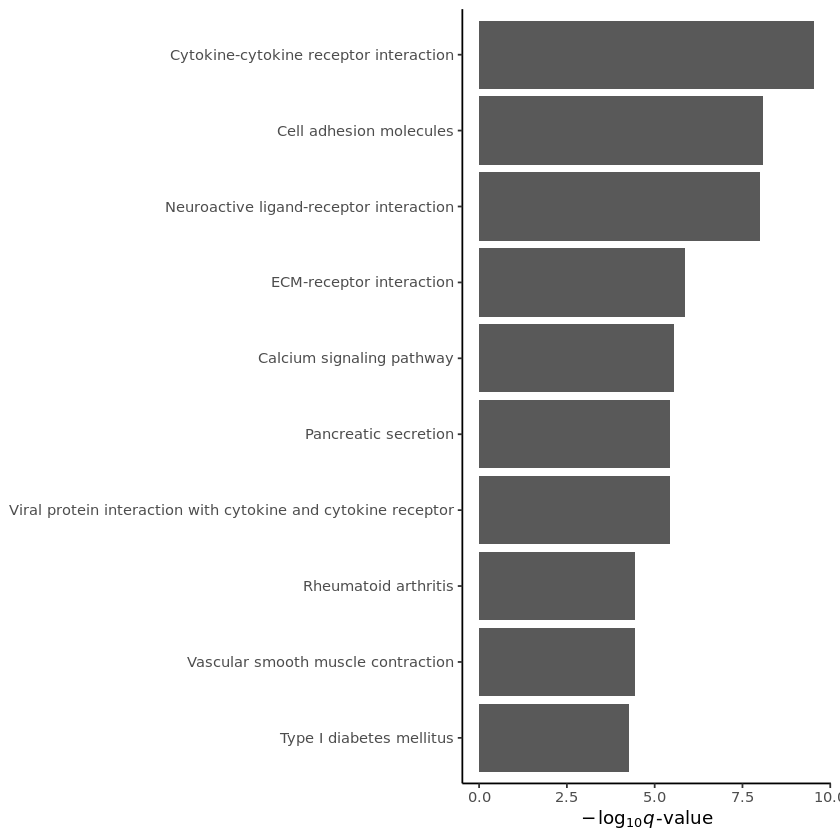

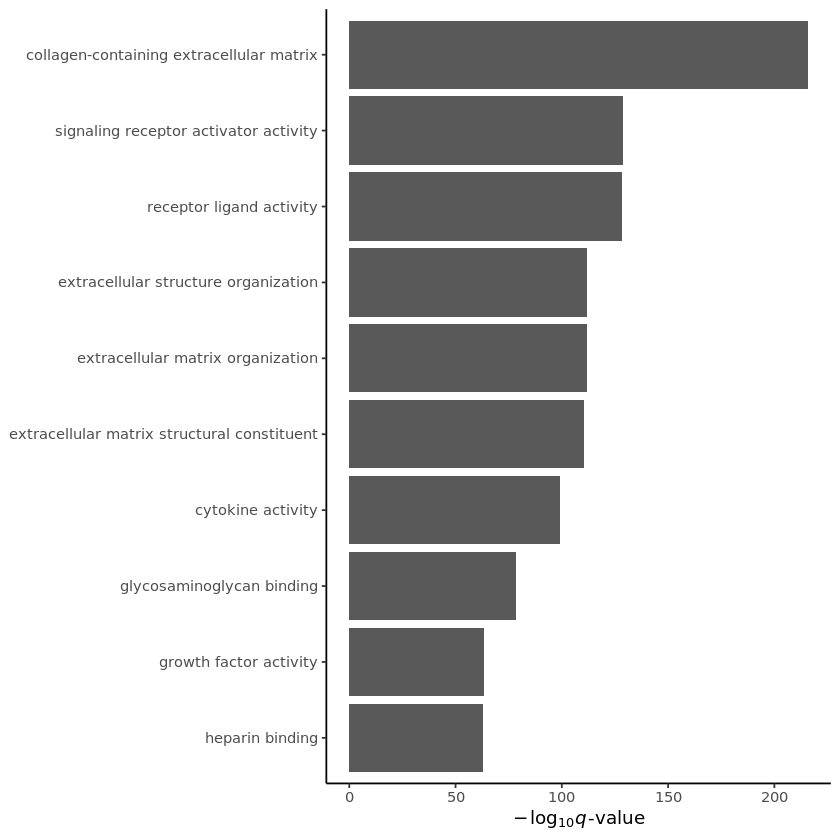

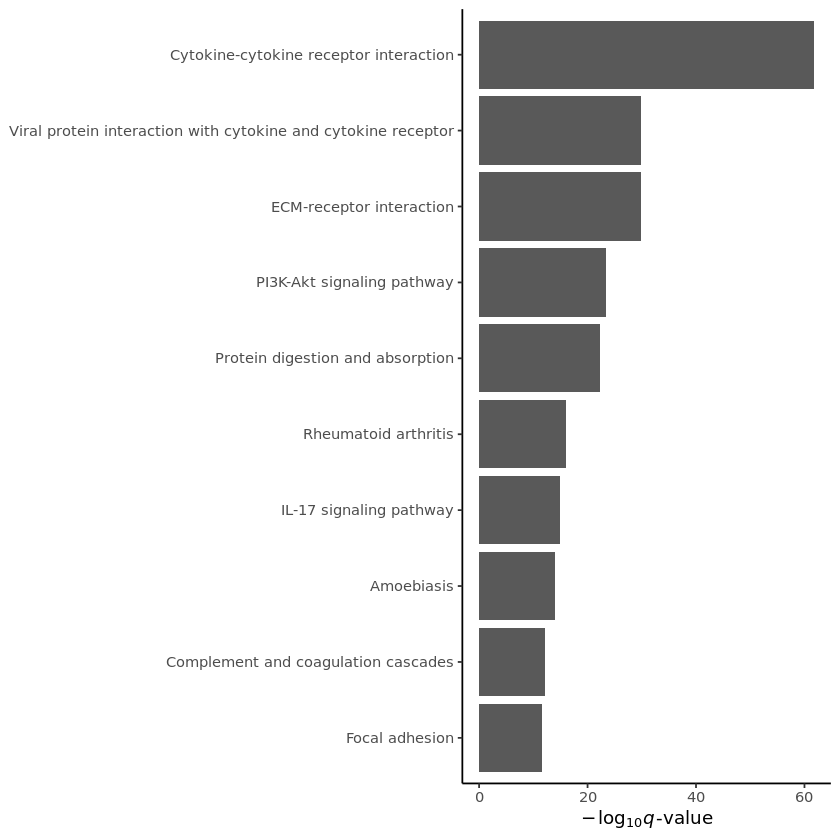

In [7]:
ea_plot(deg_go_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_go.png"), last_plot(), height = ht, width = wd, dpi = dpi)

ea_plot(deg_kegg_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_deg_kegg.png"), last_plot(), height = ht, width = wd, dpi = dpi)

ea_plot(demg_go_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_go.png"), last_plot(), height = ht, width = wd, dpi = dpi)

ea_plot(demg_kegg_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_demg_kegg.png"), last_plot(), height = ht, width = wd, dpi = dpi)

# FIGO enrichment

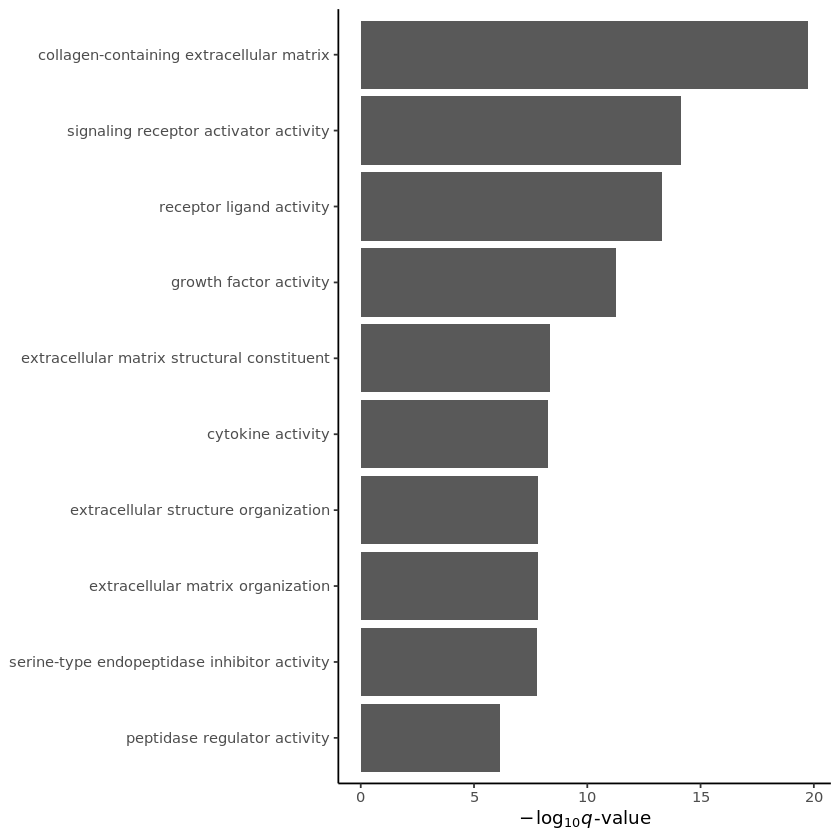

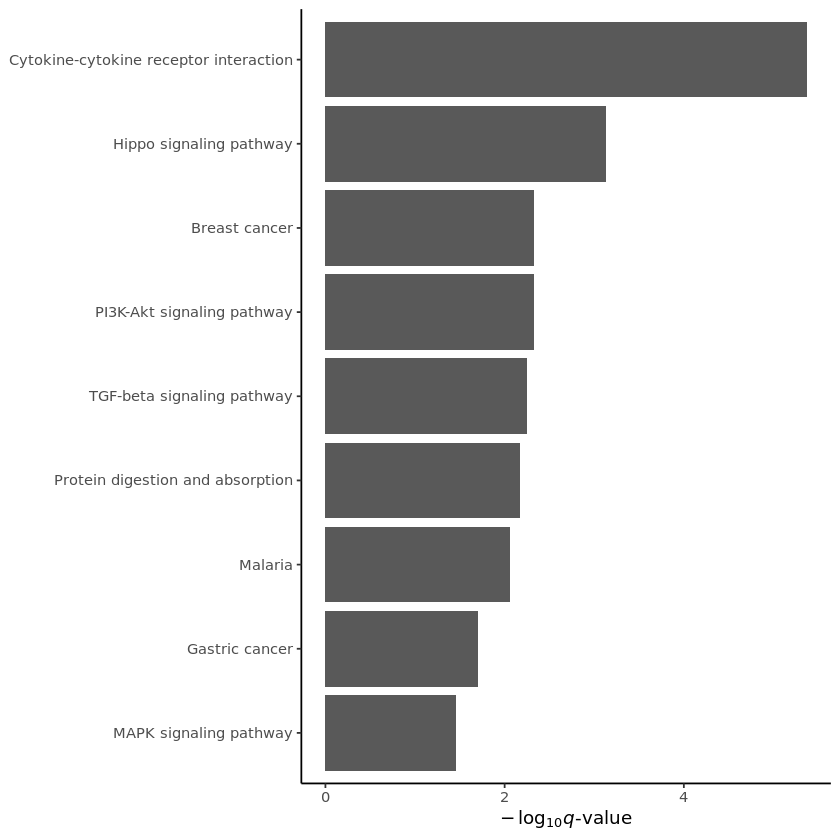

In [8]:
ea_plot(figo_go_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_go.png"), last_plot(), height = ht, width = wd, dpi = dpi)

ea_plot(figo_kegg_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_figo_kegg.png"), last_plot(), height = ht, width = wd, dpi = dpi)

# Survival enrichment

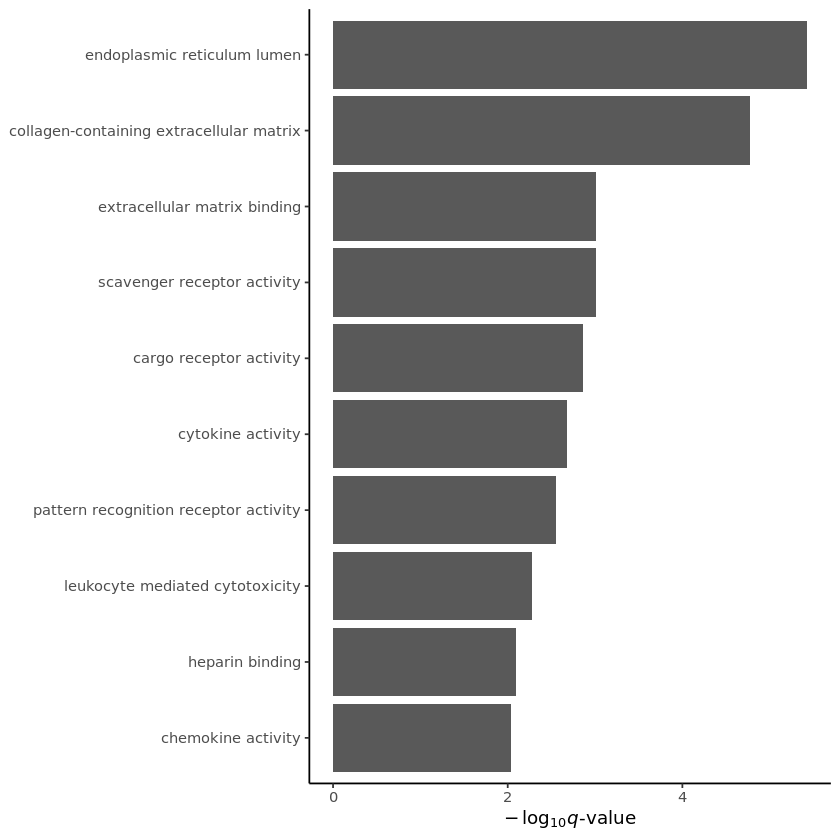

In [9]:
ea_plot(survival_go_df, top = top_n)
ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_go.png"), last_plot(), height = ht, width = wd, dpi = dpi)

if (dset_idx != 3) {
    ea_plot(survival_kegg_df, top = top_n)
    ggsave(paste0(dirs$figures_dir, "/enrichment/", unified_dsets[dset_idx], "_survival_kegg.png"), last_plot(), height = ht, width = wd, dpi = dpi)
}

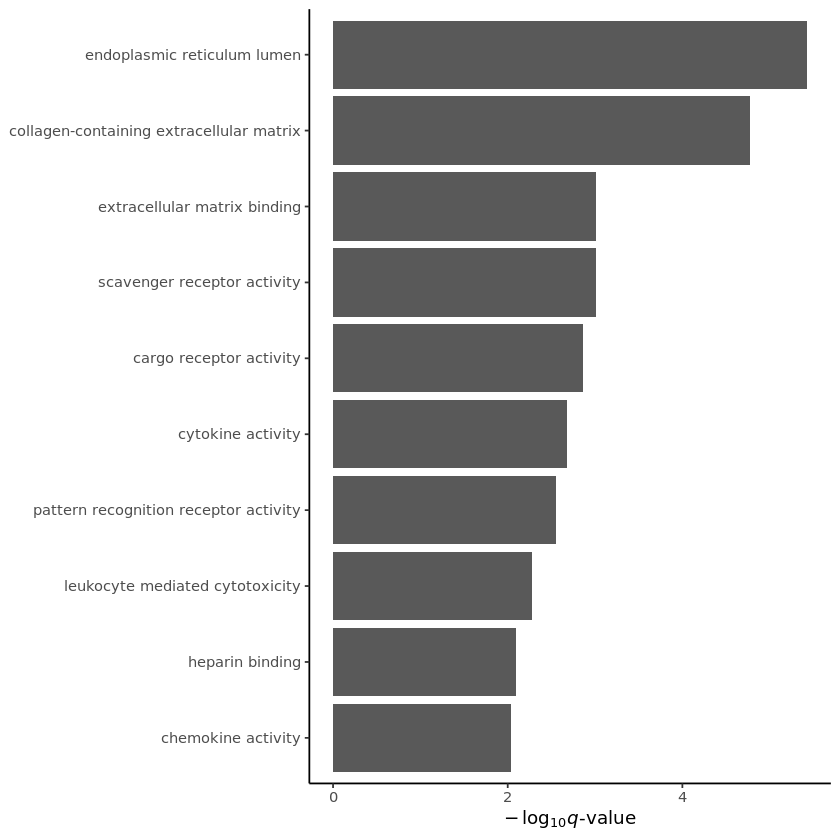

In [10]:
last_plot()